In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('./datasets/vgsales_clean.csv')
data.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
df = data.dropna()
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

As 10 maiores publicadoras por vendas Globais

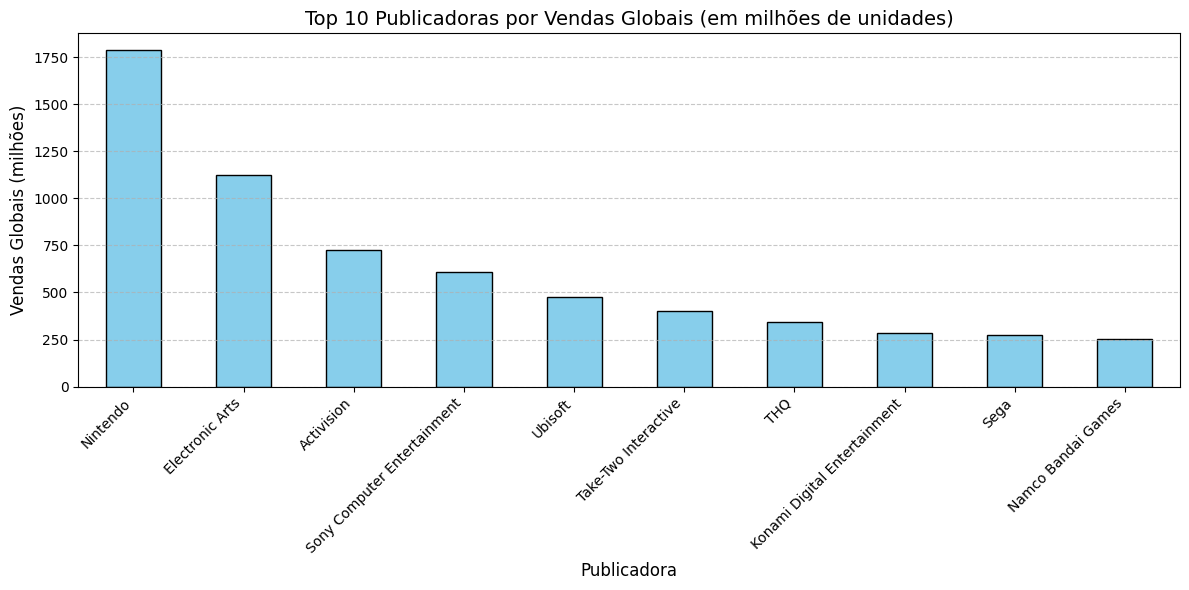

In [7]:
Publicadora_por_Vendas = data.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
Publicadora_por_Vendas.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Top 10 Publicadoras por Vendas Globais (em milhões de unidades)', fontsize=14)
plt.xlabel('Publicadora', fontsize=12)
plt.ylabel('Vendas Globais (milhões)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Os jogos mais vendidos por região

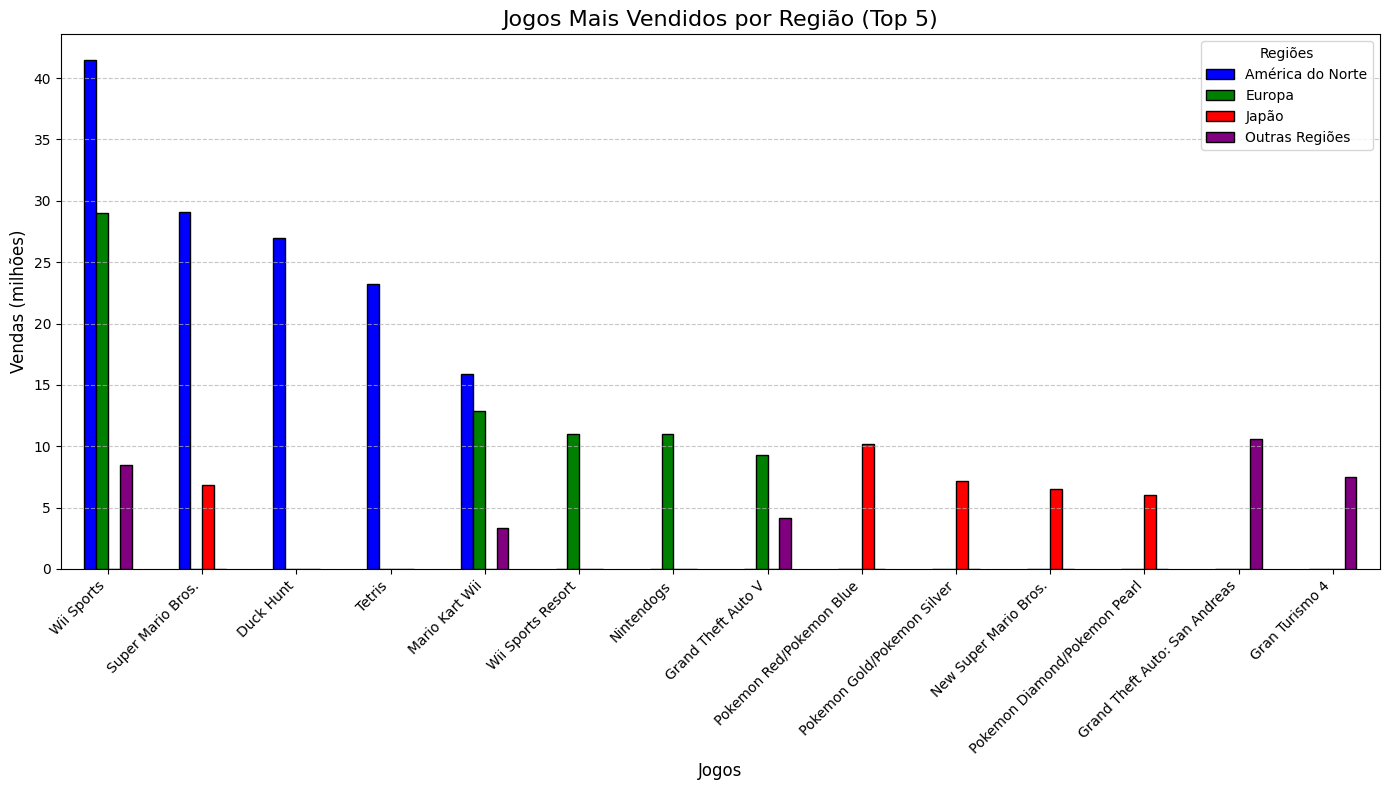

In [8]:
vendas_regiao = data[['Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

maiores_NA = vendas_regiao.nlargest(5, 'NA_Sales')[['Name', 'NA_Sales']].set_index('Name')
maiores_EU = vendas_regiao.nlargest(5, 'EU_Sales')[['Name', 'EU_Sales']].set_index('Name')
maiores_JP = vendas_regiao.nlargest(5, 'JP_Sales')[['Name', 'JP_Sales']].set_index('Name')
maiores_Outras_Regioes = vendas_regiao.nlargest(5, 'Other_Sales')[['Name', 'Other_Sales']].set_index('Name')

top_jogos = pd.concat([
    maiores_NA.rename(columns={'NA_Sales': 'América do Norte'}),
    maiores_EU.rename(columns={'EU_Sales': 'Europa'}),
    maiores_JP.rename(columns={'JP_Sales': 'Japão'}),
    maiores_Outras_Regioes.rename(columns={'Other_Sales': 'Outras Regiões'})
], axis=1).fillna(0)

top_jogos.plot(kind='bar', figsize=(14, 8), color=['blue', 'green', 'red', 'purple'], edgecolor='black')

plt.title('Jogos Mais Vendidos por Região (Top 5)', fontsize=16)
plt.xlabel('Jogos', fontsize=12)
plt.ylabel('Vendas (milhões)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Regiões', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Gênero Predominante por Região

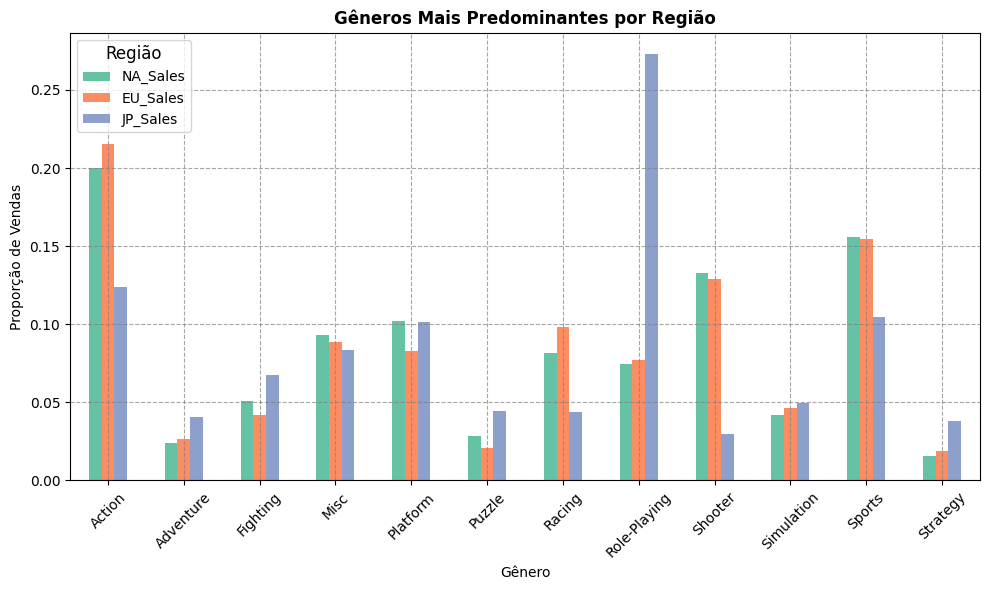

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

valores_por_regiao = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales']].sum()
valores_por_regiao = valores_por_regiao.reset_index()

valores_por_regiao_normalizado = valores_por_regiao.set_index('Genre').apply(lambda x: x / x.sum(), axis=0)

fig, ax = plt.subplots(figsize=(10, 6))

colors = sns.color_palette("Set2", len(valores_por_regiao_normalizado.columns))

valores_por_regiao_normalizado.plot(
    kind='bar',
    stacked=False,
    color=colors,
    ax=ax
)

text_color = 'black'
ax.set_title('Gêneros Mais Predominantes por Região', fontweight='bold', color=text_color)
ax.set_xlabel('Gênero', color=text_color)
ax.set_ylabel('Proporção de Vendas', color=text_color)
ax.tick_params(axis='x', rotation=45, colors=text_color)
ax.tick_params(axis='y', colors=text_color)
ax.legend(title='Região', loc='upper left', fontsize=10, title_fontsize=12, facecolor='white')

ax.grid(True, linestyle='--', alpha=0.7, color='gray')

plt.tight_layout()
plt.show()
